In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print(f"The root mean squared error is {rmse}")

def prepare_data(data, n_steps):
    X, Y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        Y.append(data[i+n_steps])
    return np.array(X), np.array(Y)

In [ ]:
#create function to call table from google sheet
def urlcall_sheet(a, index_column, parse_date):
  sheet_url_trf = a.replace('/edit#gid=', '/export?format=csv&gid=')
  b = pd.read_csv(sheet_url_trf, index_col= index_column, parse_dates=parse_date)
  return b

In [ ]:
df = urlcall_sheet('https://docs.google.com/spreadsheets/d/1bYaCfZgBCAcSq_nLln-pBcseA9Bl0KiEVhLhp_LR8-Q/edit#gid=1931766755', 'Date', ['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [ ]:
#Checking Missing Value
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


<Axes: xlabel='Date'>

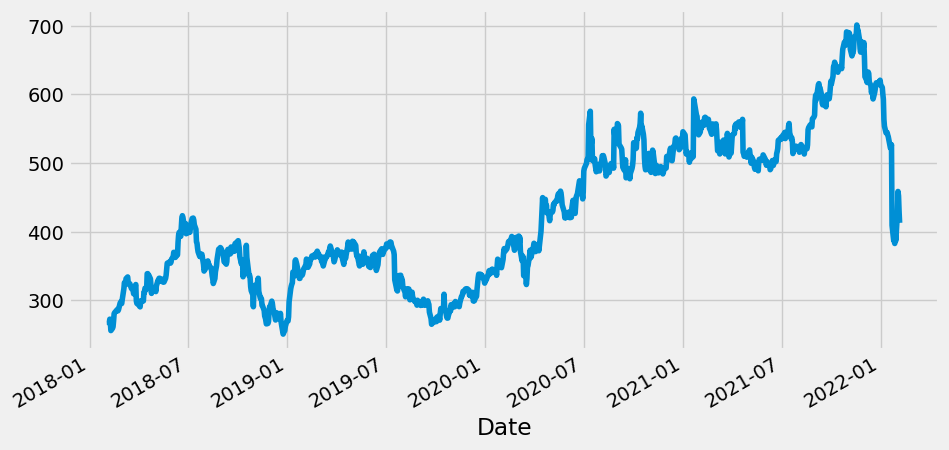

In [ ]:
plt.figure(figsize=(10, 5))
df['High'].plot()

In [ ]:
data= df['High'].values.reshape(-1,1)

In [ ]:
# Scaling the dataset
scalling = StandardScaler()
data_scaled = scalling.fit_transform(data)

In [ ]:
X, y = prepare_data(data_scaled, 60)

In [ ]:
X.shape,y.shape

((949, 60, 1), (949, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((759, 60, 1), (190, 60, 1), (759, 1), (190, 1))

In [ ]:
# The LSTM architecture
model_lstm = Sequential()
# First LSTM layer with Dropout regularisation
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
# Second LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
# Third LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
# Fourth LSTM layer
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
# The output layer
model_lstm.add(Dense(units=1))

# Compiling the RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
model_lstm.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 25s 153ms/step - loss: 0.2426
Epoch 2/100
24/24 [==============================] - 3s 105ms/step - loss: 0.1257
Epoch 3/100
24/24 [==============================] - 3s 106ms/step - loss: 0.1101
Epoch 4/100
24/24 [==============================] - 3s 107ms/step - loss: 0.1018
Epoch 5/100
24/24 [==============================] - 3s 140ms/step - loss: 0.0983
Epoch 6/100
24/24 [==============================] - 4s 145ms/step - loss: 0.0831
Epoch 7/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0783
Epoch 8/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0779
Epoch 9/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0737
Epoch 10/100
24/24 [==============================] - 3s 147ms/step - loss: 0.0690
Epoch 11/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0667
Epoch 12/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0590
Epoch 13/100

In [ ]:
predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = scalling.inverse_transform(predicted_stock_price)
y_test_inverse = scalling.inverse_transform(y_test)

6/6 [==============================] - 2s 51ms/step


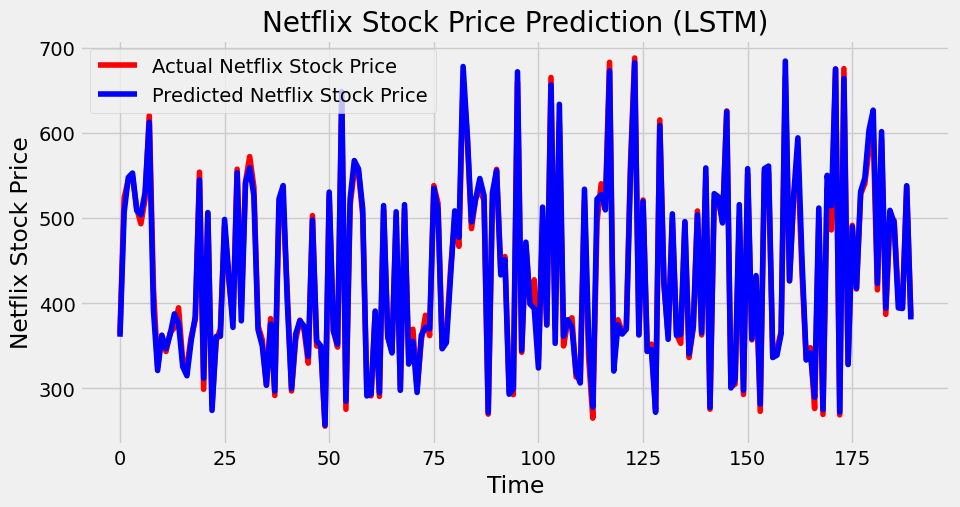

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inverse, color='red',label='Actual Netflix Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

In [ ]:
lstm_rmse = return_rmse(y_test_inverse,predicted_stock_price)
lstm_rmse

The root mean squared error is 9.631047203741629


In [ ]:
# The GRU architecture
LSTM_GRU = Sequential()
# First GRU layer with Dropout regularisation
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Second GRU layer
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Third GRU layer
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# Fourth GRU layer
LSTM_GRU.add(GRU(units=50, activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
# The output layer
LSTM_GRU.add(Dense(units=1))
# Compiling the RNN
LSTM_GRU.compile(SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
LSTM_GRU.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
24/24 [==============================] - 10s 127ms/step - loss: 0.2947
Epoch 2/50
24/24 [==============================] - 4s 162ms/step - loss: 0.0828
Epoch 3/50
24/24 [==============================] - 3s 112ms/step - loss: 0.0570
Epoch 4/50
24/24 [==============================] - 3s 114ms/step - loss: 0.0545
Epoch 5/50
24/24 [==============================] - 3s 113ms/step - loss: 0.0527
Epoch 6/50
24/24 [==============================] - 4s 163ms/step - loss: 0.0492
Epoch 7/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0491
Epoch 8/50
24/24 [==============================] - 3s 112ms/step - loss: 0.0471
Epoch 9/50
24/24 [==============================] - 3s 112ms/step - loss: 0.0505
Epoch 10/50
24/24 [==============================] - 3s 113ms/step - loss: 0.0466
Epoch 11/50
24/24 [==============================] - 4s 176ms/step - loss: 0.0488
Epoch 12/50
24/24 [==============================] - 3s 112ms/step - loss: 0.0455
Epoch 13/50
24/24 [=====

In [ ]:
GRU_predicted_stock_price = LSTM_GRU.predict(X_test)
GRU_predicted_stock_price = scalling.inverse_transform(GRU_predicted_stock_price)
GRU_y_test_inverse = scalling.inverse_transform(y_test)

6/6 [==============================] - 2s 28ms/step


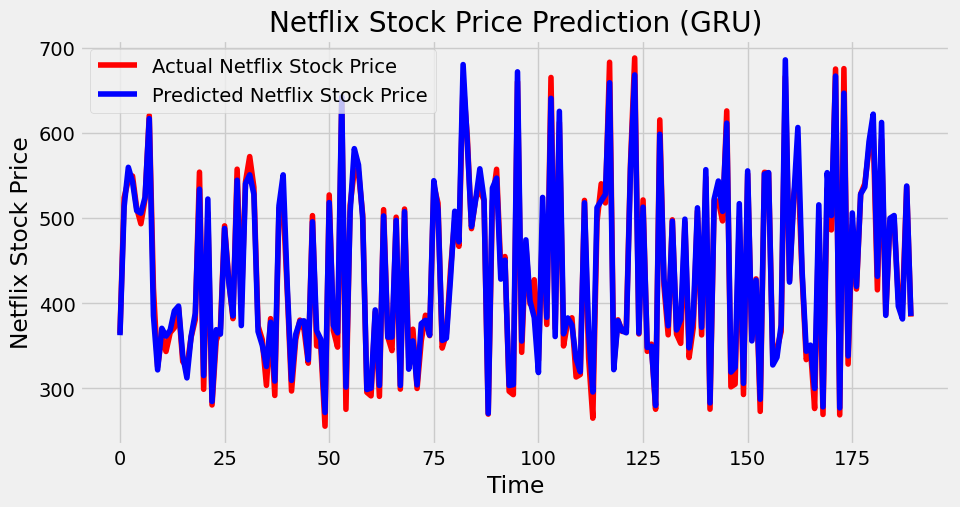

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(GRU_y_test_inverse, color='red',label='Actual Netflix Stock Price')
plt.plot(GRU_predicted_stock_price, color='blue',label='Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction (GRU)')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

In [ ]:
gru_rmse = return_rmse(GRU_y_test_inverse,GRU_predicted_stock_price)
gru_rmse

The root mean squared error is 13.31290950743576


In [ ]:
table_rmse_score = pd.DataFrame({'RMSE Score' : [9.631047203741629, 13.31290950743576]}, index=['LSTM', 'GRU'])
table_rmse_score

,RMSE Score
LSTM,9.631047
GRU,13.312910


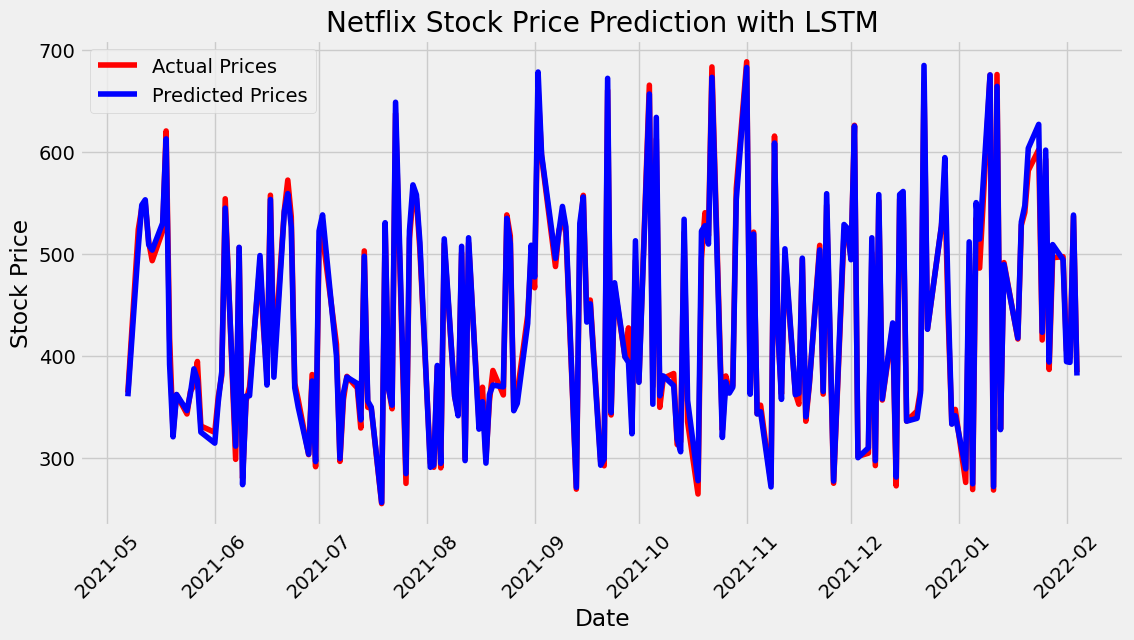

In [ ]:
dates_test = df.index[-len(y_test):]
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test_inverse, label='Actual Prices', color='red')
plt.plot(dates_test, predicted_stock_price, label='Predicted Prices', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Netflix Stock Price Prediction with LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.show()